<a href="https://colab.research.google.com/github/ferjozsot23/machine-learning/blob/main/Outliers_and_OneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fernando José Soto Jácome

# Objetivos
1. Comprender qué son los valores atípicos y su impacto en el tratamiento de un dataframe
1. Eliminar outliers y convertir variables categóricas en numéricas mediante one-hot
1. Conocer la importancia del uso de técnicas de normalización o escalamiento de datos.

# Introducción
La ingeniería de características es un paso fundamental para el proceso de creación de un modelo de aprendizaje autónomo ya que no solo tiene un gran impacto en el rendimiento del programa, sino que permite lograr predicciones más acertadas basandose en las variables previamente seleccionadas.

En este paso, se agregan variables que pueden representar un valor significativo para el modelo. Por ejemplo, convertir variables categóricas a númericas permite, en ciertas ocaciones, un mayor rendimiento para el modelo. Además, reconocer el impacto de valores atípicos es importante dentro de esta fase de creación de un modleo de aprendizaje autónomo.

# Ejercicios presentados

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("eBayAuctions.csv")
data.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


## 1. BoxPlot - Visualización de variables atípicos

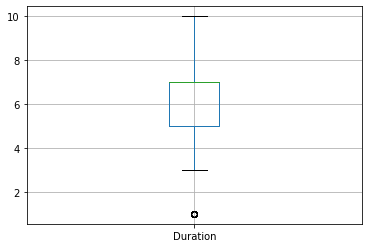

In [ ]:
boxplot=data.boxplot(column=['Duration'])

In [ ]:
data.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


**En efecto, el diagrama BoxPlot representa de manera adecuada la información presentada por data.describe()**

### Eliminación de outliers con Desviación Estandar

In [ ]:
data.shape ## Veamos cuántos registros posee el dataframe antes de eliminar outliers

(1972, 8)

In [ ]:
factor = 2
upper_lim = data['Duration'].mean () + data['Duration'].std() * factor
lower_lim = data['Duration'].mean () - data['Duration'].std() * factor

data_no_outliers = data[(data['Duration'] < upper_lim) & (data['Duration'] > lower_lim)]
print(data_no_outliers)

              Category currency  sellerRating  Duration endDay  ClosePrice  \
0     Music/Movie/Game       US          3249         5    Mon        0.01   
1     Music/Movie/Game       US          3249         5    Mon        0.01   
2     Music/Movie/Game       US          3249         5    Mon        0.01   
3     Music/Movie/Game       US          3249         5    Mon        0.01   
4     Music/Movie/Game       US          3249         5    Mon        0.01   
...                ...      ...           ...       ...    ...         ...   
1967        Automotive       US          2992         5    Sun      359.95   
1968        Automotive       US            21         5    Sat      610.00   
1969        Automotive       US          1400         5    Mon      549.00   
1970        Automotive       US            57         7    Fri      820.00   
1971        Automotive       US           145         7    Sat      999.00   

      OpenPrice  Competitive?  
0          0.01             0  

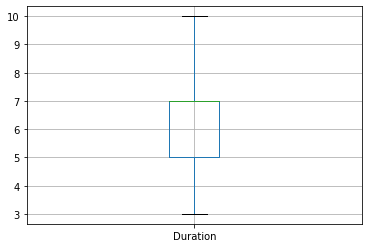

In [ ]:
boxplot=data_no_outliers.boxplot(column=['Duration'])

In [ ]:
data_no_outliers.shape

(1949, 8)

**Como se puede notar, ya no existe el círculo al principio del boxplot, es decir ya se eliminó el valor atípico**

## 2. One-hot encoding usando sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_no_outliers.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [ ]:
data_no_outliers['endDay'].value_counts()

Mon    548
Sat    350
Sun    338
Fri    268
Thu    199
Tue    171
Wed     75
Name: endDay, dtype: int64

In [ ]:
data_cat = data_no_outliers[['endDay']]

In [ ]:
data_cat.head()

,endDay
0,Mon
1,Mon
2,Mon
3,Mon
4,Mon


In [ ]:
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<1949x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1949 stored elements in Compressed Sparse Row format>

In [ ]:
data_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(data_cat_1hot.toarray(), columns=cat_encoder.get_feature_names())
#concat with original data
data_no_outliers = pd.concat([data_no_outliers, ohe_df], axis=1).drop(['endDay'], axis=1)
data_no_outliers.head(10)

,Category,currency,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?,x0_Fri,x0_Mon,x0_Sat,x0_Sun,x0_Thu,x0_Tue,x0_Wed
0,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Music/Movie/Game,US,3249.0,5.0,0.01,0.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Como se logra apreciar, la variable endDay, que representa los días de la semana, ha sido convertido a variables numéricas**

# Conclusiones

1. Se concluye que la ingeniería de caracterísiticas permite establecer nuevas variables dentro de nuestro dataframe las cuales permitan alcanzar un mayor rendimiento para nuestro modelo
1. Se determina que one-hot encoding, normalización y scaling con métodos fundamentales dentro de esta fase del proceso pues permite agregar y determinar las variables y sus valores con mayor importancia y relevancia dentro del dataframe

# Bibliografía

Pandas. (SN). pandas.DataFrame.boxplot. Obtenido de https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
